#  Exploratory data analysis on publications concerning COVID-19 



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset V4
Dataset is located in CORD19v4_pubdate_R/data/CORD19id_date.csv, provided by @bmkramer

In [2]:
data_fp = os.path.join('CORD19v4_pubdate_R','data','CORD19id_date.csv')


data = pd.read_csv(data_fp)
print('size of dataset: ', data.shape)
print('The number of publications without publication date: ', pd.isna(data.date).sum())

size of dataset:  (44220, 5)
The number of publications without publication date:  639


In [3]:
def to_date_type(pdate):
    '''
        converts given date column (i.e. pdate) to datetime type
    '''
    try:
          return pd.to_datetime(str(pdate))
    except:
          pass

In [8]:
def agg_data(data , period):
    '''
        aggregate dataset based on the given 'period'
    '''
    data['p'] = data.date.dt.to_period(period).astype(str)
    # # aggregate based on 'created'
    data_agg_all = data.groupby(['p']).size().reset_index(name='count')
    
    return data_agg_all

def plot_publications(data_agg_all, title='', start_period='', end_period='', xlabel='', ylabel='', figsize_x=10, figsize_y=5, filename = '', isWeekly=False):
    '''
        plot a line chart for the given period
    '''
    cond = (data_agg_all['p']!='NaT')
    cond = cond & (data_agg_all['p']>= start_period) if start_period != '' else cond
    cond = cond & (data_agg_all['p']<= end_period) if end_period != '' else cond
    
    data_agg_cond = data_agg_all[cond]

    data_agg_cond['count_running_total'] = data_agg_cond['count'].cumsum()
    
    # Initialize the figure
    plt.style.use('seaborn-whitegrid') #'' seaborn,seaborn-darkgrid

    plt.figure(figsize=(figsize_x,figsize_y), dpi=300)
    
    
    if isWeekly:
        plt.xticks(np.arange(len(data_agg_cond['p'])),[x[-8:] for x in data_agg_cond['p']] ,rotation=90)
    else:
        plt.xticks(rotation=90)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Plot the lineplot
    plt.plot(data_agg_cond['p'], data_agg_cond['count_running_total'], marker='', color='olive', 
             linewidth=1.9, alpha=0.9, label='Cumulative # of publications', linestyle='dashed')
    # Plot the lineplot
    plt.plot(data_agg_cond['p'], data_agg_cond['count'], marker='', color='skyblue', 
             linewidth=1.9, alpha=0.9, label='Exact # of publications')
    
    
    plt.legend()
               
    if filename != '':
        plt.savefig(filename, dpi=300)


In [9]:
# convert 'date' column to datetime type
data['date']= data.apply(lambda x:to_date_type(x['date']),axis=1)

### The number of COVID-19 publications on weekly basis

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


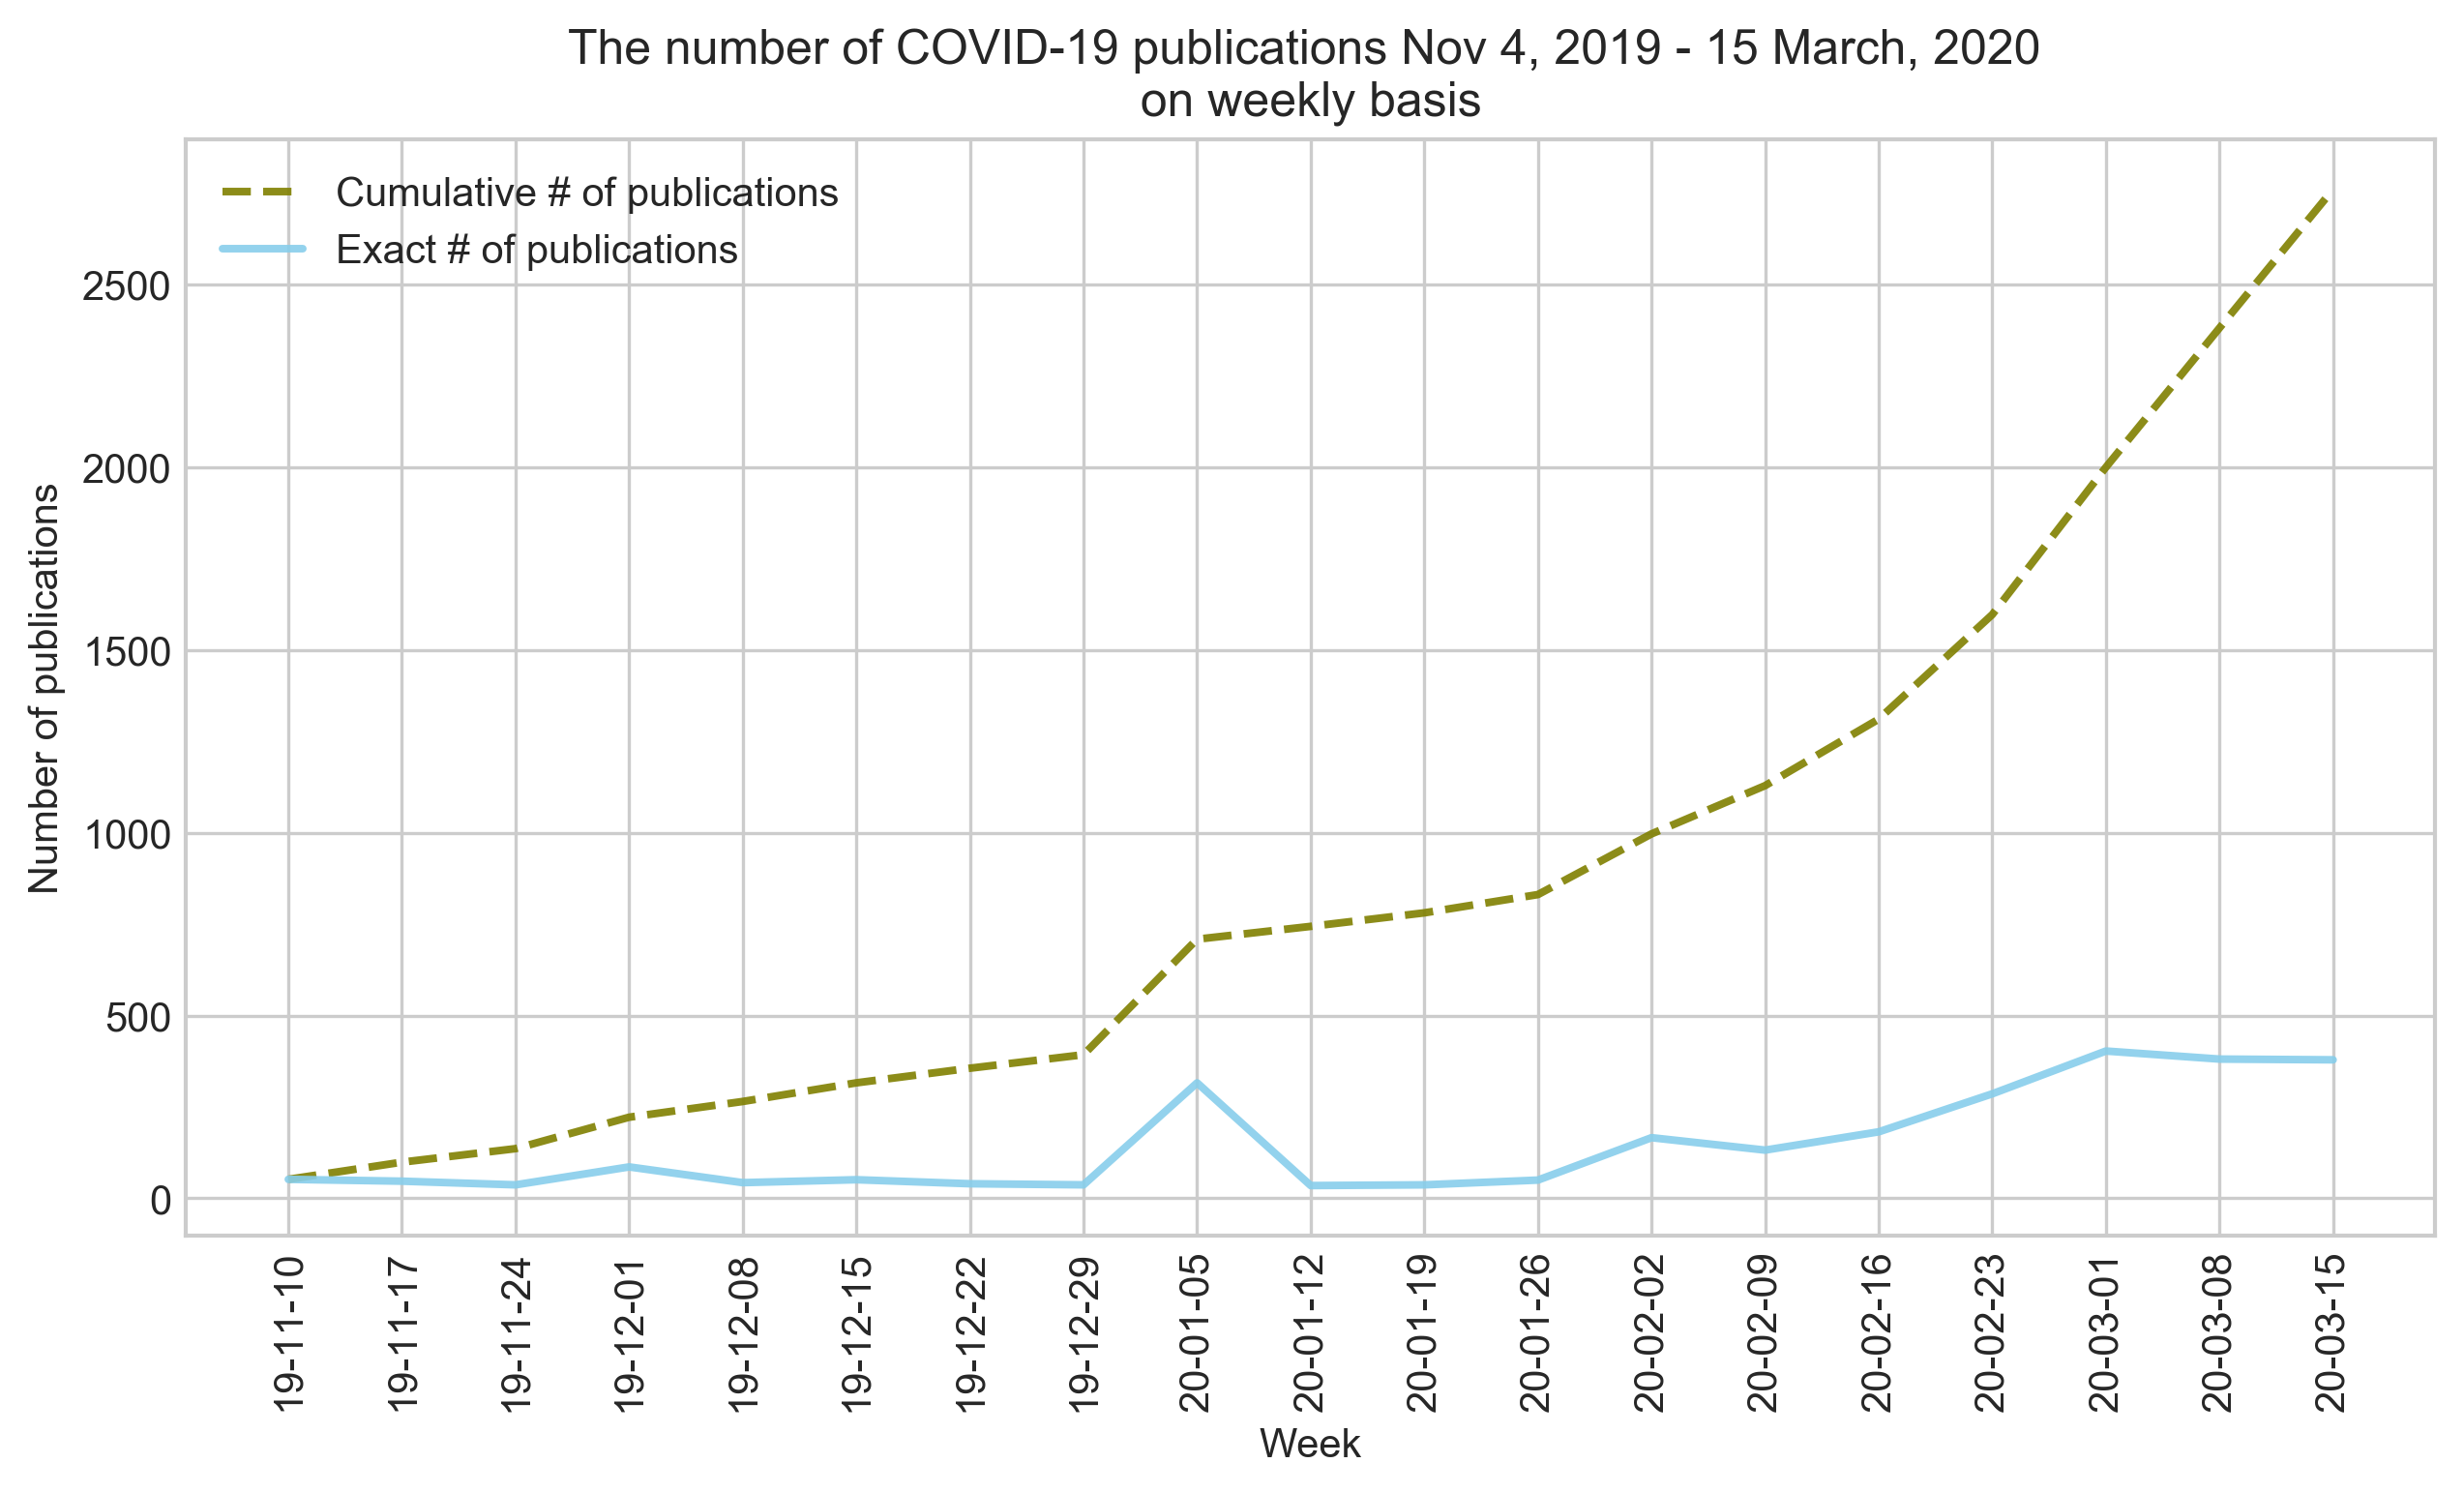

In [10]:
data_agg_all = agg_data(data , 'W')
plot_publications(data_agg_all, 
                  title= 'The number of COVID-19 publications Nov 4, 2019 - 15 March, 2020 \n on weekly basis ', 
                  start_period='2019-11-04/2019-11-10', end_period='2020-03-09/2020-03-15', 
                  xlabel ='Week', ylabel= 'Number of publications', figsize_x=10, figsize_y=5, filename = 'image/pub_num_weekly.png', isWeekly=True)

### The number of COVID-19 publications on monthly basis

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


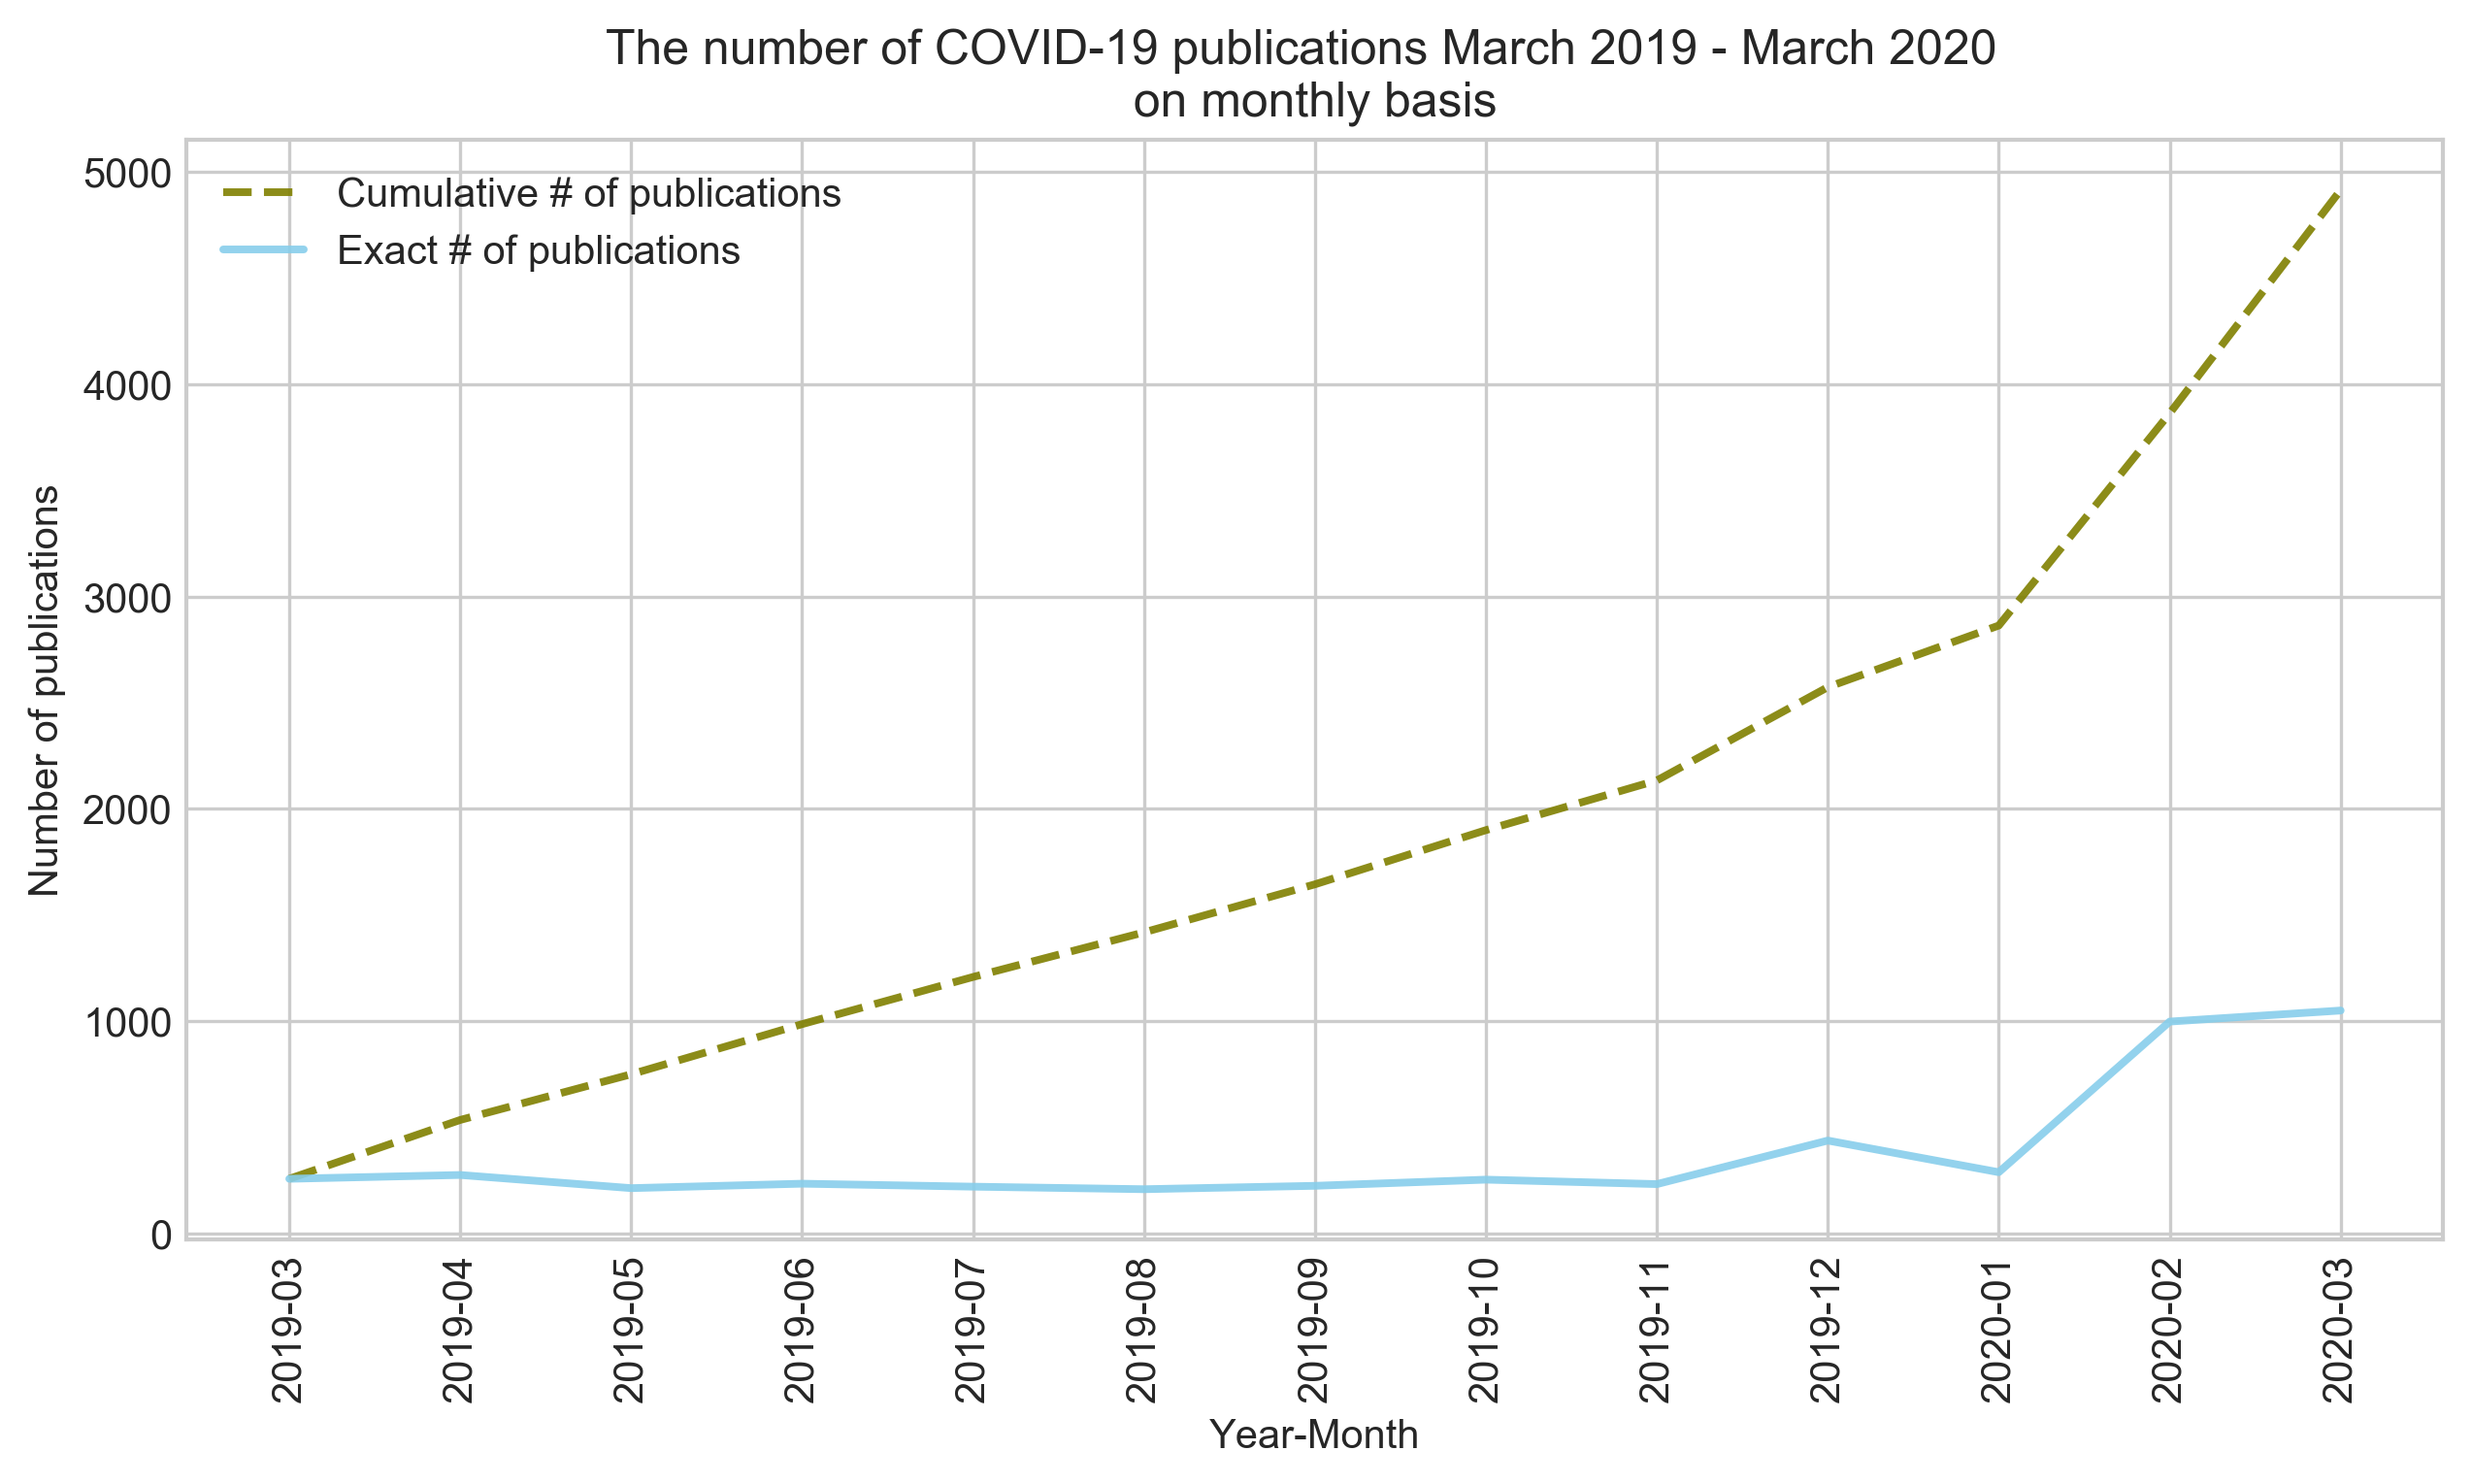

In [19]:
data_agg_all = agg_data(data , 'M')

plot_publications(data_agg_all, 
                  title= 'The number of COVID-19 publications March 2019 - March 2020  \n on monthly basis ', 
                  start_period='2019-03', end_period='2020-03',
                  xlabel ='Year-Month', ylabel= 'Number of publications')

## Published papers after Dec 1 2019
Dataset is located in CORD19v4_pubdate_R/data/CORD19_201912.csv, provided by @bmkramer

In [13]:
data_dec19_fp = os.path.join('CORD19v4_pubdate_R','data','CORD19_201912.csv')


data_dec19 = pd.read_csv(data_dec19_fp, encoding='latin-1')
print('size of dataset: ', data_dec19.shape)
print('The number of publications without publication date: ', pd.isna(data_dec19.date).sum())

size of dataset:  (3513, 16)
The number of publications without publication date:  479


In [14]:
# convert 'date' column to datetime type
data_dec19['date']= data_dec19.apply(lambda x:to_date_type(x['date']),axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


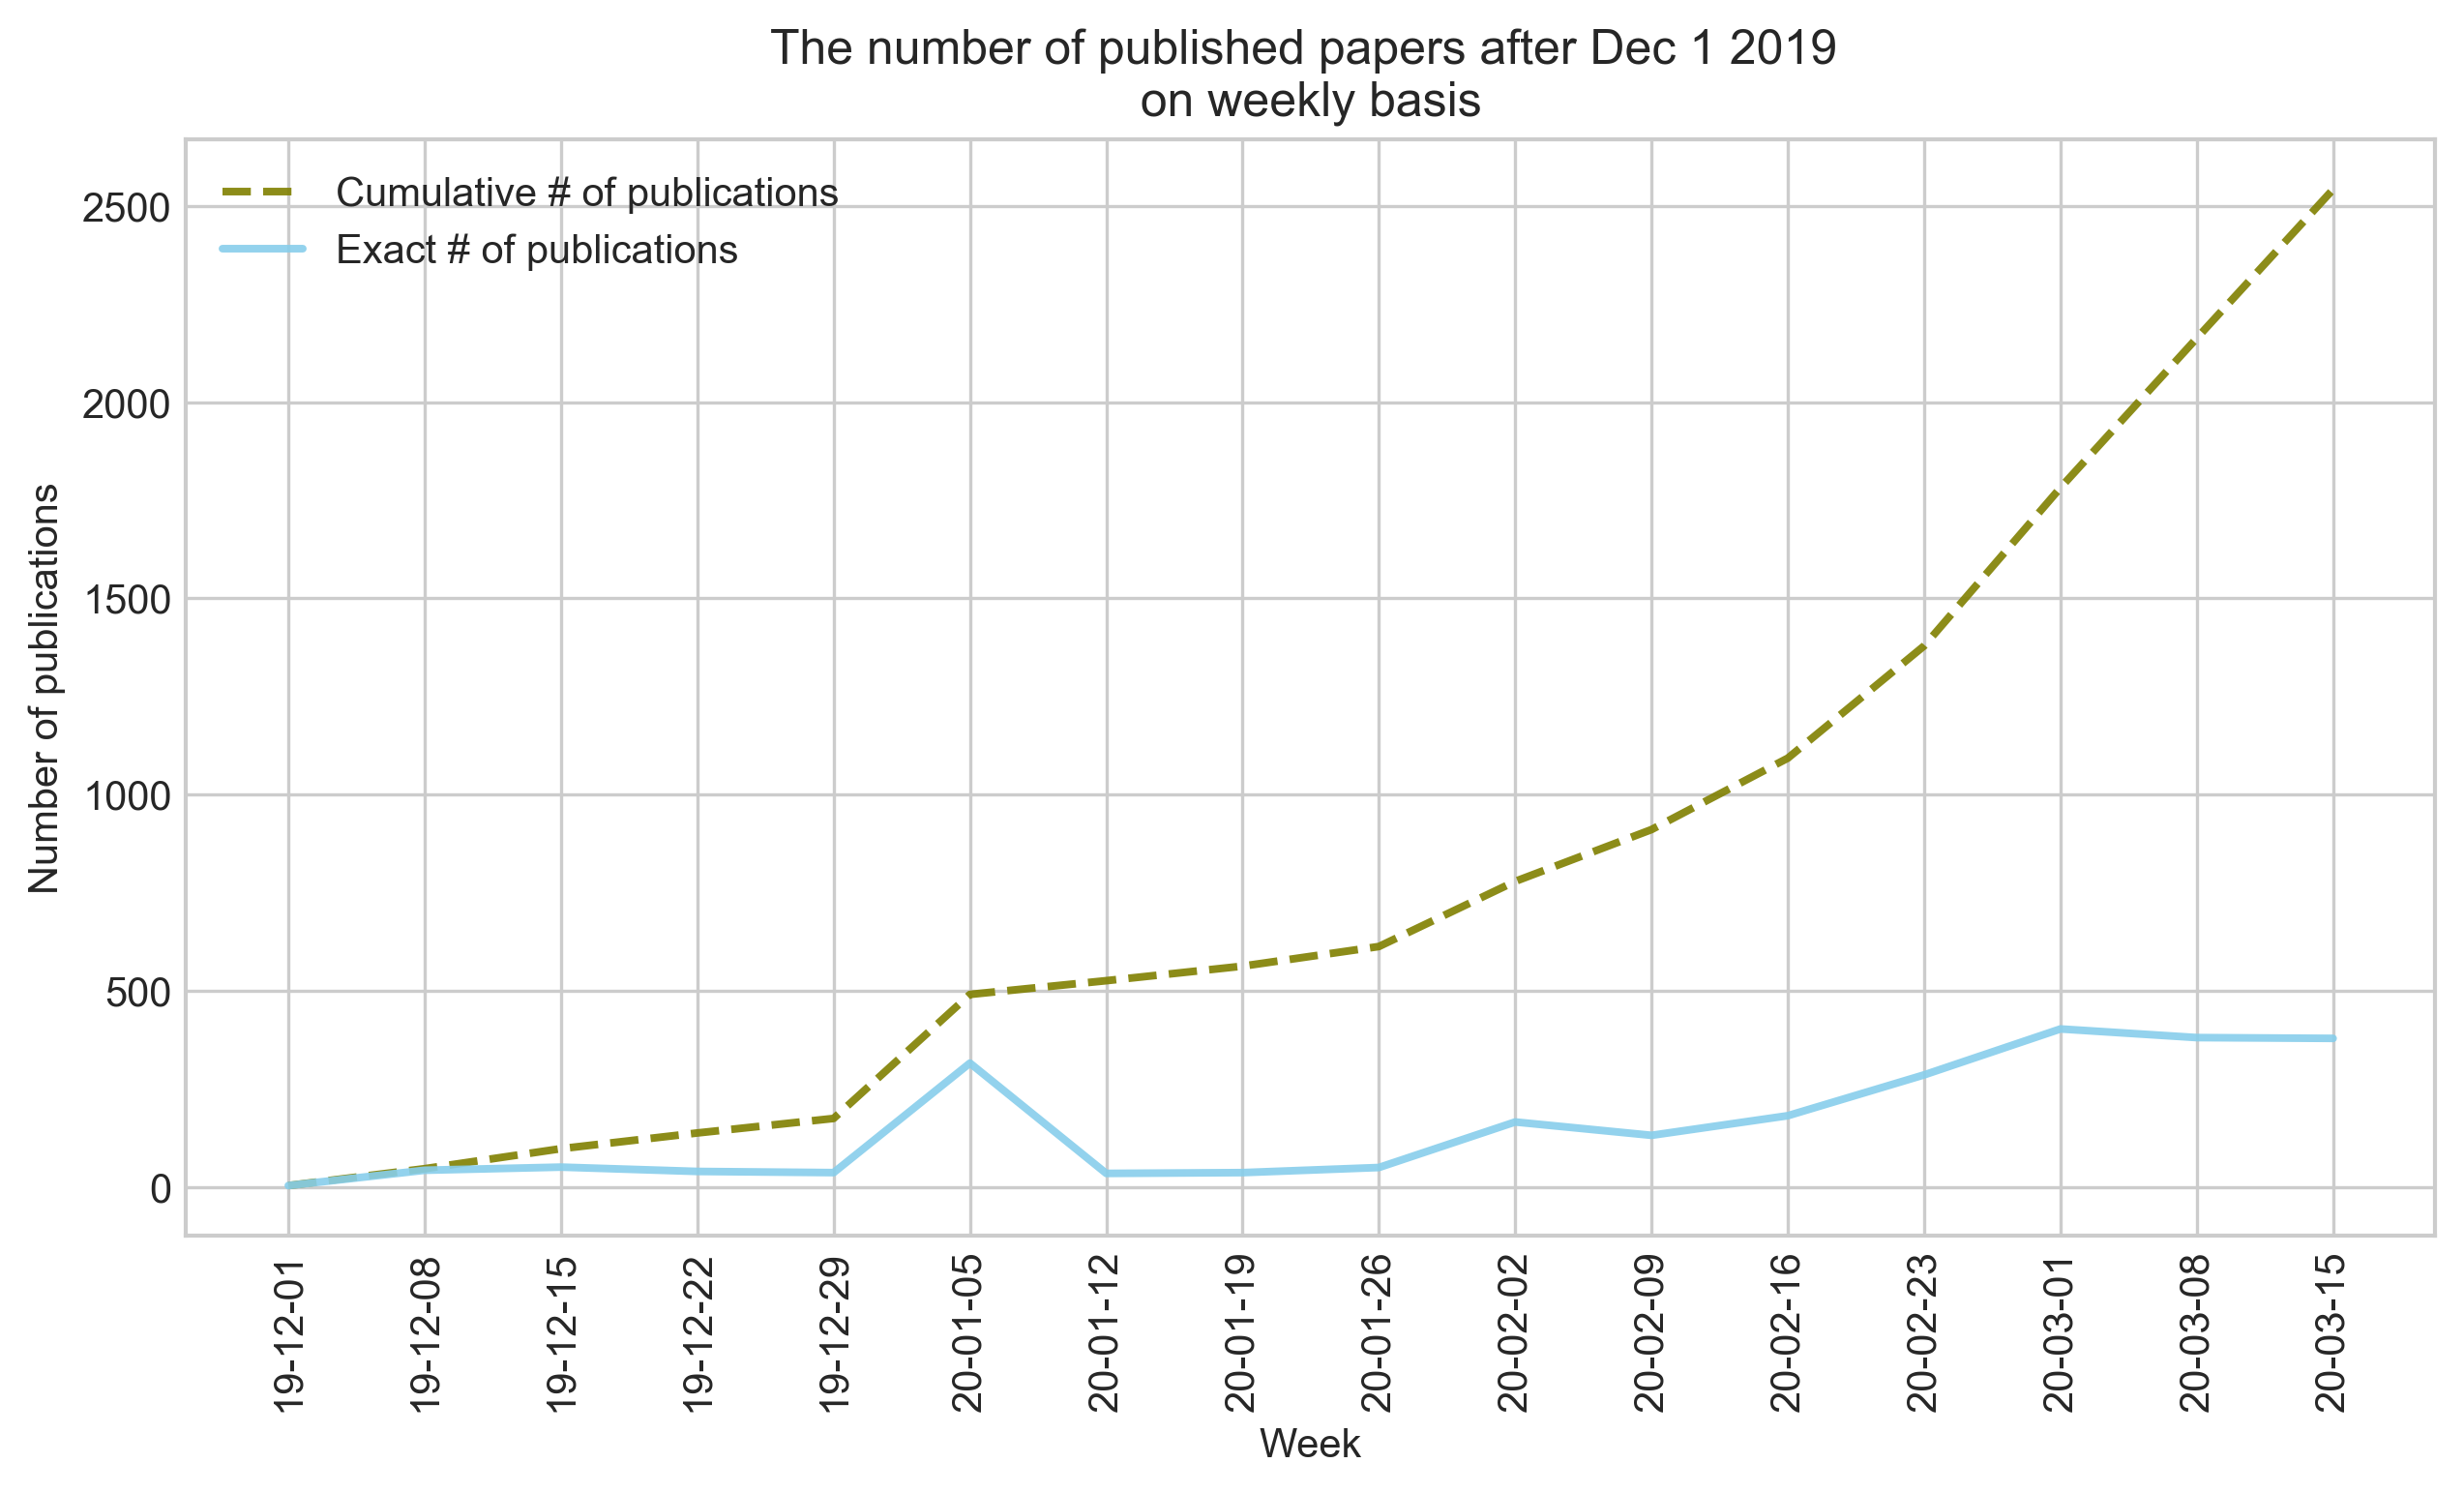

In [16]:
data_agg_all = agg_data(data_dec19 , 'W')
plot_publications(data_agg_all, 
                  title= 'The number of published papers after Dec 1 2019 \n on weekly basis ', 
                  start_period='2019-11-25/2019-12-01', end_period='2020-03-09/2020-03-15', 
                  xlabel ='Week', ylabel= 'Number of publications',isWeekly=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


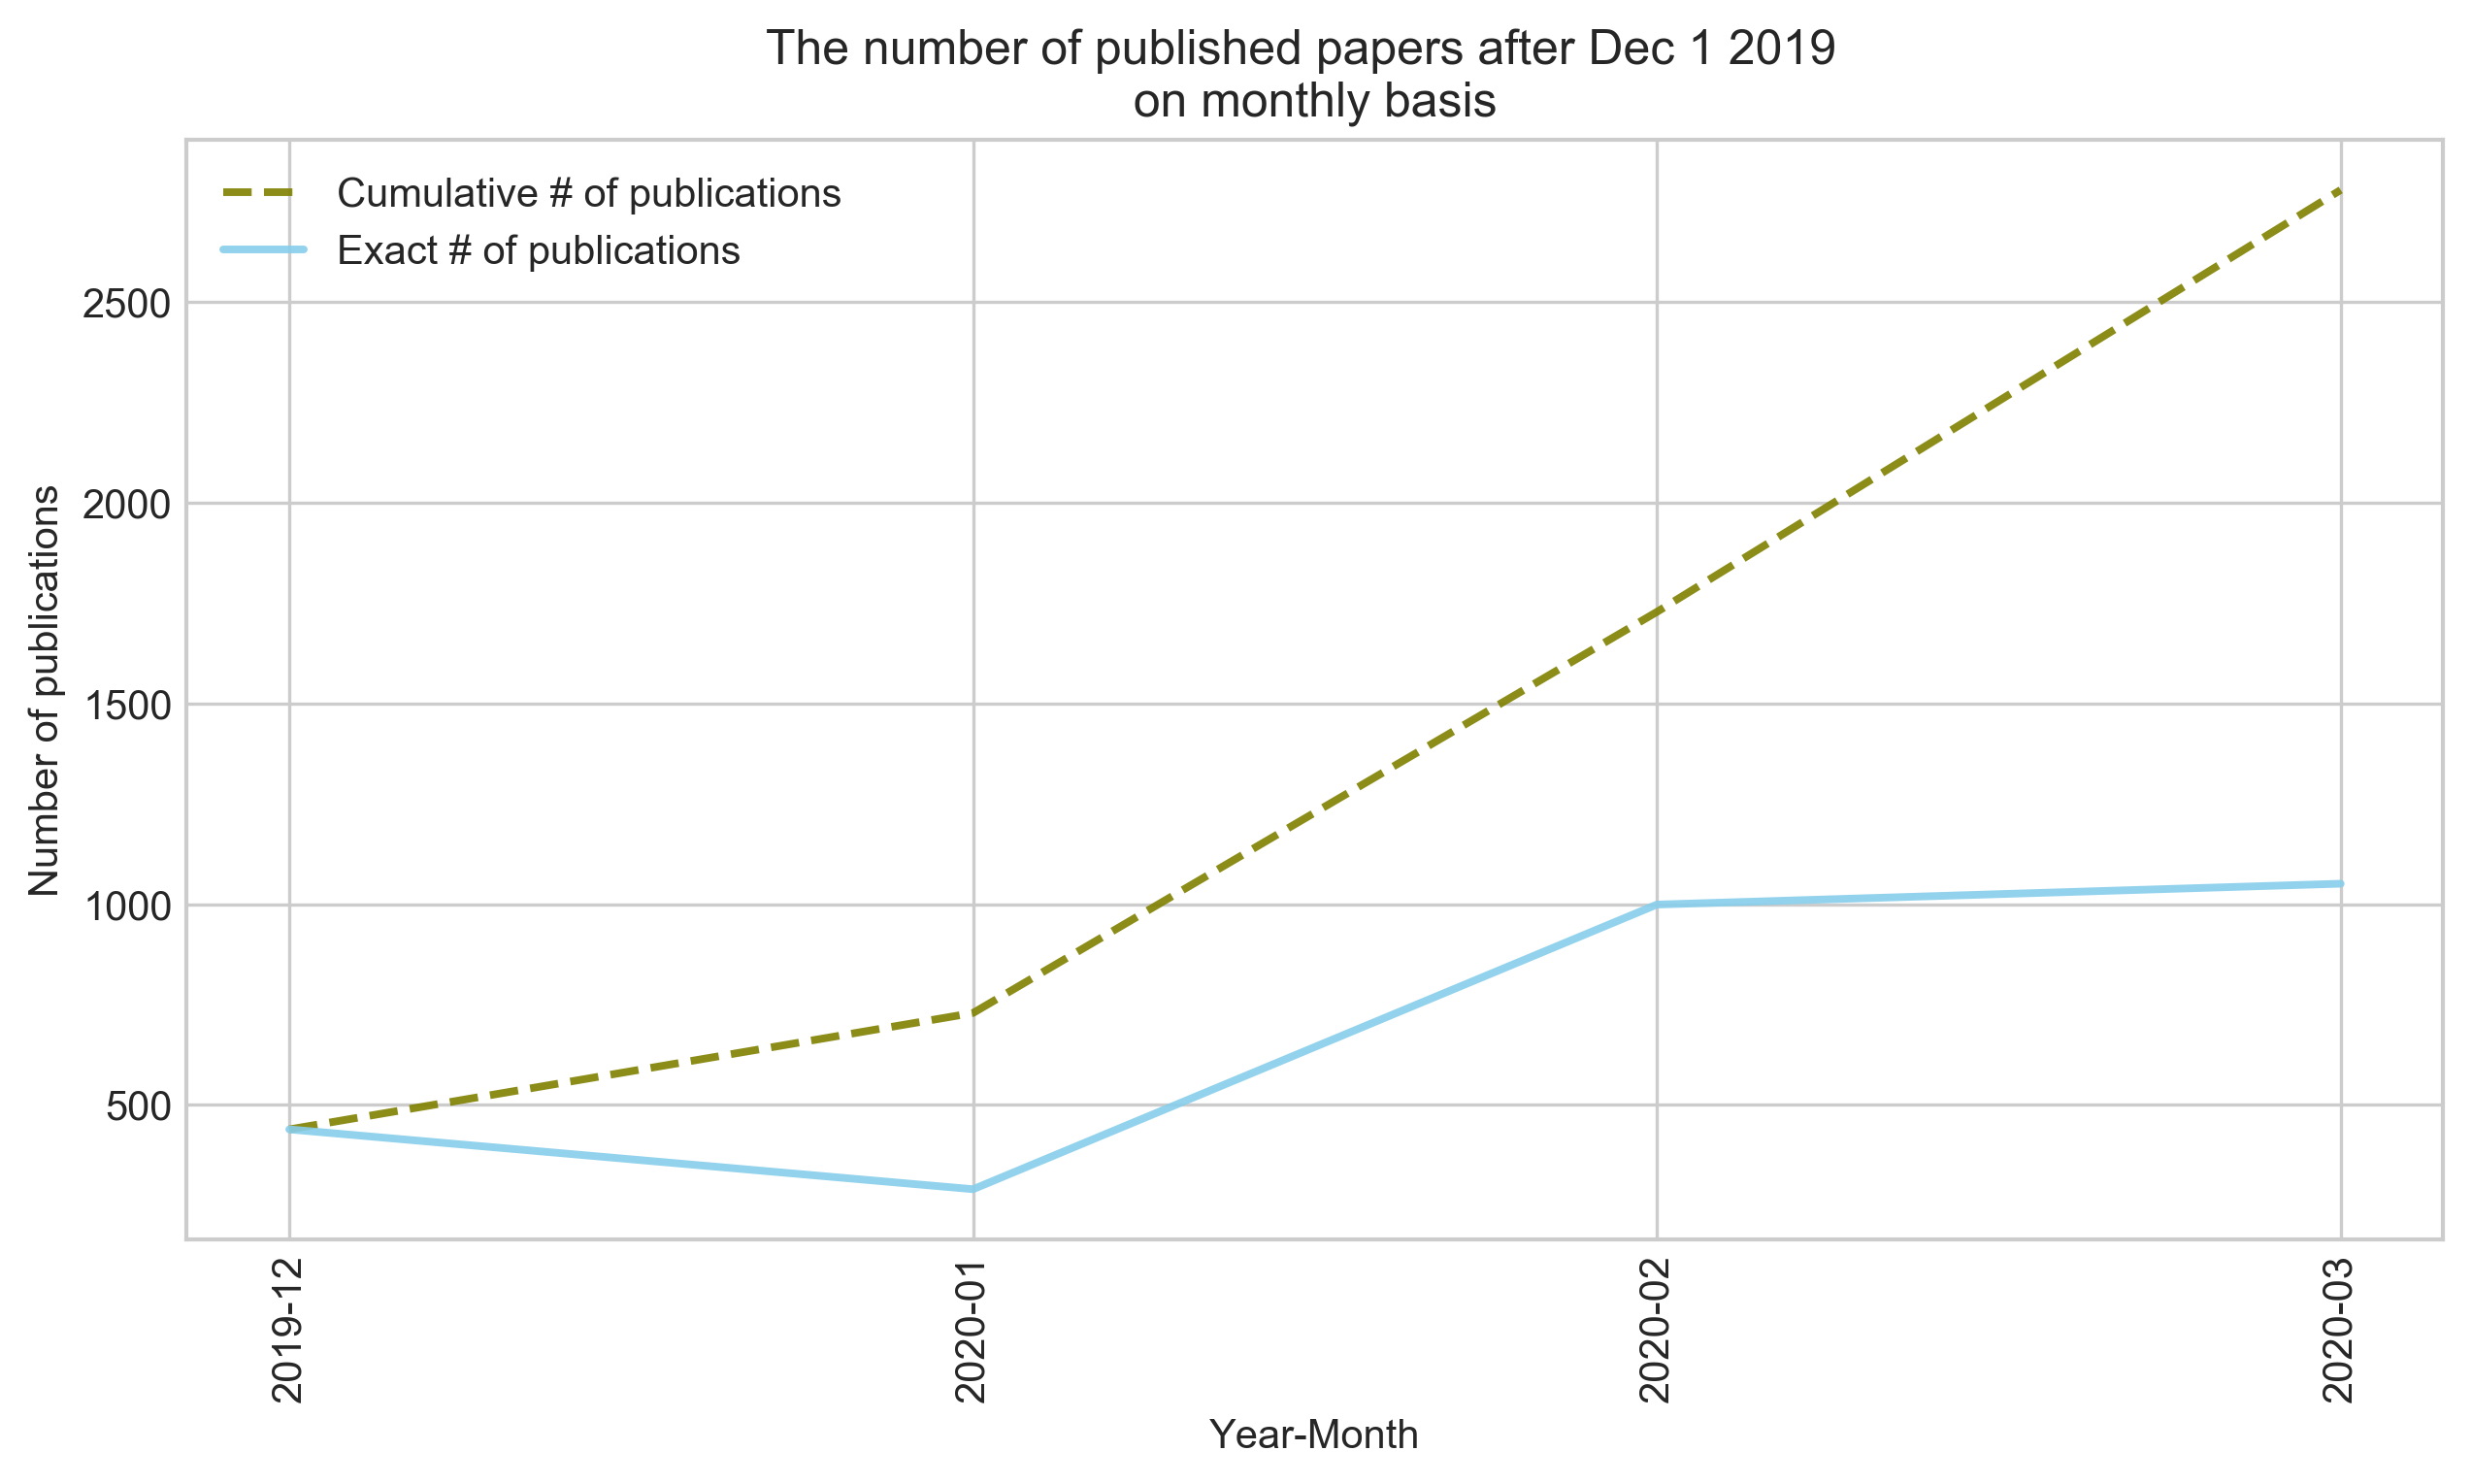

In [17]:
data_agg_all = agg_data(data_dec19 , 'M')
plot_publications(data_agg_all, 
                  title= 'The number of published papers after Dec 1 2019  \n on monthly basis ', 
                  start_period='2019-12', end_period='2020-03',
                  xlabel ='Year-Month', ylabel= 'Number of publications')

## Number of publications per source


In [20]:
def fill_all_dates(df_data, start_date, end_date): 
    '''
        make a dataframe including all days in the range, from 'start_dat' to 'end_dat', for all sources.
        
    '''
    dts = pd.date_range(start=start_date,end=end_date).values
    df = pd.DataFrame(data={'date':dts})
    
    sources = df_data.source_x.unique()
    for s in sources:
            df_s = df_data.loc[df_data['source_x']==s,['date','count']]
            df = df.merge(df_s, on='date', how= 'left')
            df.columns.values[-1]=s
                
    df = df.fillna(0)

    return df
 
    
def prep_dataset(data, start_date, end_date):
    '''
        aggregate the number of publications per day/ per publisher
        make a dataframe including all days in the given date-range
    '''
    data_agg_all = data.groupby(['source_x','date']).size().reset_index(name='count')
    cond = (data_agg_all['date']>=start_date) & (data_agg_all['date']<=end_date)

    df = fill_all_dates(data_agg_all[cond], start_date, end_date)
    return df



### Weekly report

In [21]:
start_date = "2019-11-01"
end_date = "2020-03-20" 
df = prep_dataset(data, start_date, end_date)


period ='W'
df['p'] = df.date.dt.to_period(period).dt.strftime('%Y-w%U')

# aggregate based on the given period
df_agg = df.groupby(['p']).sum().reset_index()

df_agg.head()

,p,CZI,Elsevier,PMC,PMC_new,WHO,biorxiv,medrxiv
0,2019-w44,0.0,1.0,15.0,0.0,0.0,0.0,0.0
1,2019-w45,1.0,5.0,44.0,1.0,0.0,1.0,0.0
2,2019-w46,0.0,9.0,34.0,0.0,0.0,3.0,1.0
3,2019-w47,0.0,3.0,27.0,0.0,1.0,6.0,0.0
4,2019-w48,0.0,48.0,34.0,0.0,1.0,3.0,0.0


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.5, 1.02, 'The number of publications concerning COVID-19 \n in different sources')

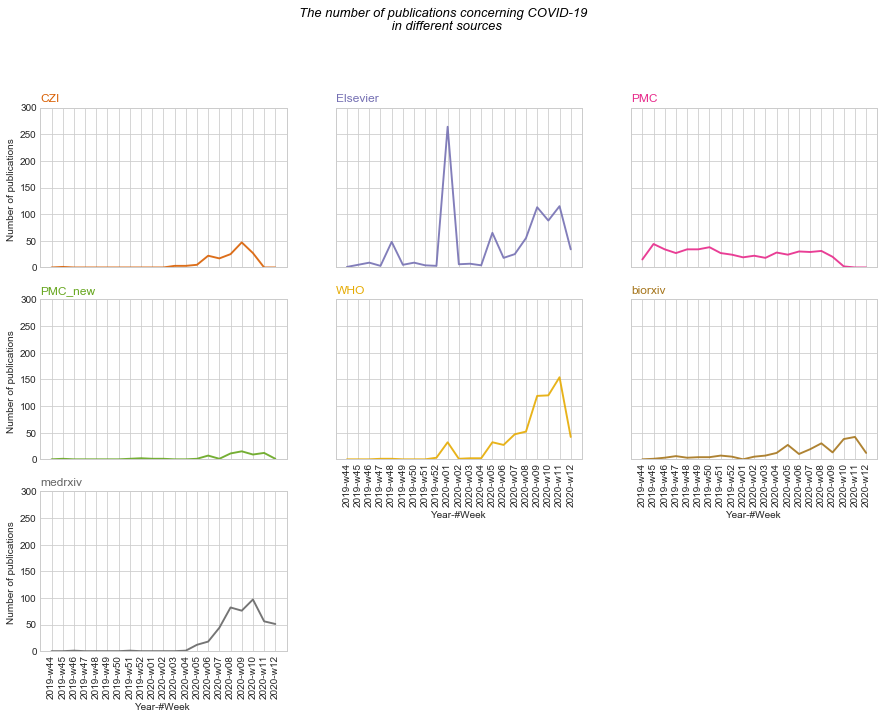

In [22]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

# Initialize the figure
plt.style.use('seaborn-whitegrid') #'' seaborn,seaborn-darkgrid
 
# create a color palette
palette = plt.get_cmap('Dark2')
 
plt.figure(figsize=(15,10))
# multiple line plot
num=0
for column in df_agg.drop('p', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df_agg['p'], df_agg[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.ylim(0,300)
    
    
    # Not ticks everywhere
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    if num not in [5,6,7] :
        plt.tick_params(labelbottom='off') 
        
    if num in [5,6,7]:
        plt.xlabel('Year-#Week ')
        
    if num in [1,4,7] :
        plt.ylabel('Number of publications ')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    plt.xticks(rotation=90)
    

# general title
plt.suptitle("The number of publications concerning COVID-19 \n in different sources", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
# plt.savefig('image/publisher_weekly.png', dpi=300)

### Number of publications per pre-prints/peer-reviews

In [23]:
df_agg['peer_reviewed']= df_agg['CZI']+df_agg['Elsevier']+df_agg['PMC']+df_agg['PMC_new']+df_agg['WHO']
df_agg['preprint']= df_agg['biorxiv']+ df_agg['medrxiv']

df_agg['peer_reviewed_cum']= df_agg['peer_reviewed'].cumsum()
df_agg['preprint_cum'] = df_agg['preprint'].cumsum()
df_agg['biorxiv_cum']= df_agg['biorxiv'].cumsum()
df_agg['medrxiv_cum'] = df_agg['medrxiv'].cumsum()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

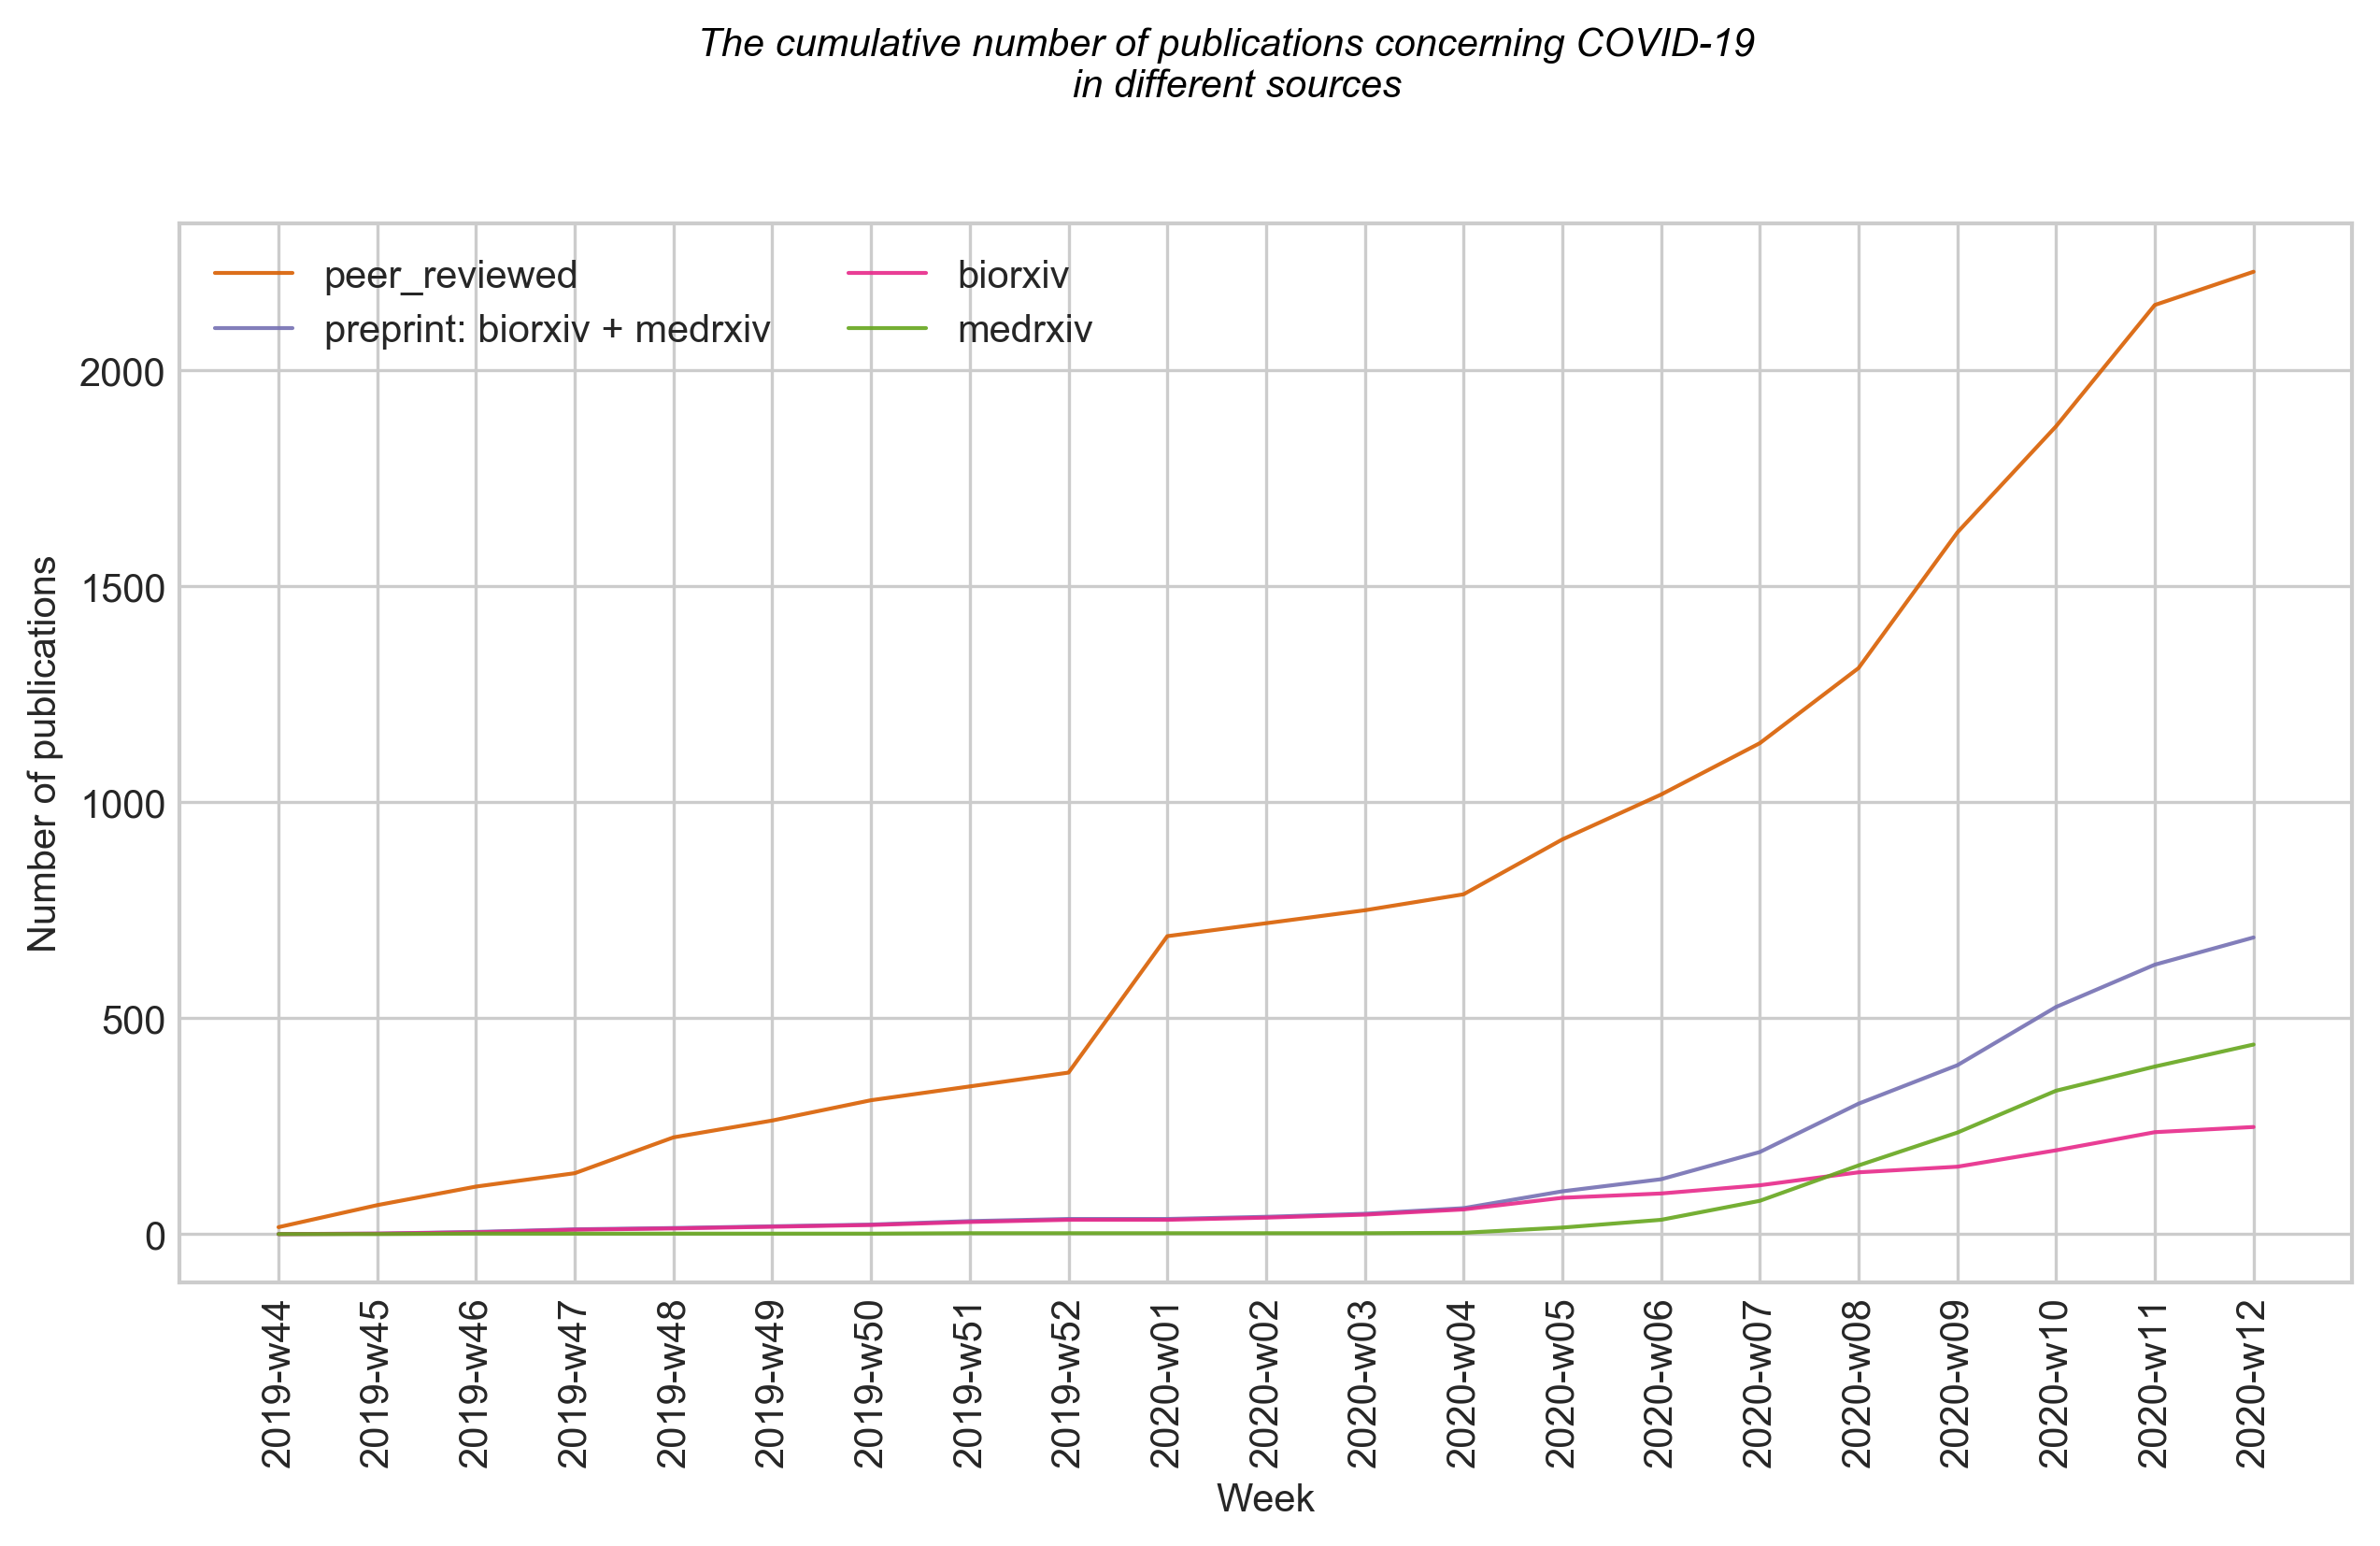

In [24]:
plt.figure(figsize=(10,5), dpi=300)
# style
plt.style.use('seaborn-whitegrid')
 
# create a color palette
palette = plt.get_cmap('Dark2')
 
# multiple line plot
plt.plot(df_agg['p'], df_agg['peer_reviewed_cum'], marker='', color=palette(1), linewidth=1, alpha=0.9, label='peer_reviewed')
plt.plot(df_agg['p'], df_agg['preprint_cum'], marker='', color=palette(2), linewidth=1, alpha=0.9, label='preprint: biorxiv + medrxiv')
plt.plot(df_agg['p'], df_agg['biorxiv_cum'], marker='', color=palette(3), linewidth=1, alpha=0.9, label='biorxiv')
plt.plot(df_agg['p'], df_agg['medrxiv_cum'], marker='', color=palette(4), linewidth=1, alpha=0.9, label='medrxiv')


# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.suptitle("The cumulative number of publications concerning COVID-19 \n in different sources", fontsize=10, fontweight=0, color='black', style='italic', y=1.02)
plt.xlabel("Week")
plt.ylabel("Number of publications")
plt.xticks(rotation=90)

# fig = plt.gcf()
# print(fig.dpi)
# size = fig.get_size_inches()*fig.dpi # size in pixels
# print(size)
# plt.savefig('image/peerreview_preprint_weekly.png')